In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
COLAB = True
print("Note: using Google CoLab")
%tensorflow_version 2.x

Mounted at /content/drive
Note: using Google CoLab


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import cv2
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
all_images_path = "/content/drive/My Drive/DMW/Training_Images"

In [4]:
data_dir = pathlib.Path(all_images_path)
image_count = len(list(data_dir.glob('*.jpg')))
print(image_count)

7000


In [5]:
LEFT = list(data_dir.glob('*_left.jpg'))
RIGHT = list(data_dir.glob('*_right.jpg'))

print(len(LEFT), '|', len(RIGHT))

3500 | 3500


In [6]:
# load all image data
image_data = '/content/drive/My Drive/DMW/pickled_data.txt'
myfile = open(image_data, mode='rb')
temp = pickle.load(myfile)
myfile.close()

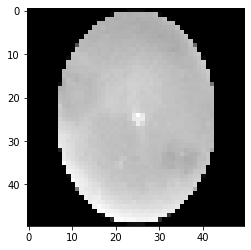

In [7]:
x = []
y = []
size_l = 50
size_b = 50

count = 0
for img in temp.keys():
  try:
    # count += 1
    image = cv2.cvtColor(temp[img], cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (size_l, size_b))
    x.append(image)
    if img.endswith('left.jpg'):
        y.append(0)
    else:
        y.append(1)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_path)
    break
  plt.imshow(x[0], cmap='gray'), x[0].shape

In [8]:
x_np = np.asarray(x)
y_np = np.asarray(y)

In [ ]:
# x_np = x_np.reshape((x_np.shape[0], x_np.shape[2], x_np.shape[1], x_np.shape[3]))
x_np.shape, y_np.shape

((7000, 50, 50), (7000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.1, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((6300, 50, 50), (700, 50, 50))

In [ ]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size_l, size_b, 1)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                125050    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 125,101
Trainable params: 125,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 50
batch_size = 15
history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.05)

Epoch 1/50
399/399 [==============================] - 1s 2ms/step - loss: 0.3573 - accuracy: 0.8635 - val_loss: 0.2608 - val_accuracy: 0.9048
Epoch 2/50
399/399 [==============================] - 1s 2ms/step - loss: 0.2593 - accuracy: 0.9039 - val_loss: 0.2402 - val_accuracy: 0.9143
Epoch 3/50
399/399 [==============================] - 1s 2ms/step - loss: 0.2278 - accuracy: 0.9195 - val_loss: 0.2204 - val_accuracy: 0.9175
Epoch 4/50
399/399 [==============================] - 1s 2ms/step - loss: 0.2339 - accuracy: 0.9116 - val_loss: 0.2604 - val_accuracy: 0.8857
Epoch 5/50
399/399 [==============================] - 1s 2ms/step - loss: 0.2291 - accuracy: 0.9111 - val_loss: 0.2105 - val_accuracy: 0.9206
Epoch 6/50
399/399 [==============================] - 1s 2ms/step - loss: 0.2115 - accuracy: 0.9220 - val_loss: 0.2200 - val_accuracy: 0.9111
Epoch 7/50
399/399 [==============================] - 1s 2ms/step - loss: 0.1989 - accuracy: 0.9256 - val_loss: 0.2093 - val_accuracy: 0.9111
Epoch 

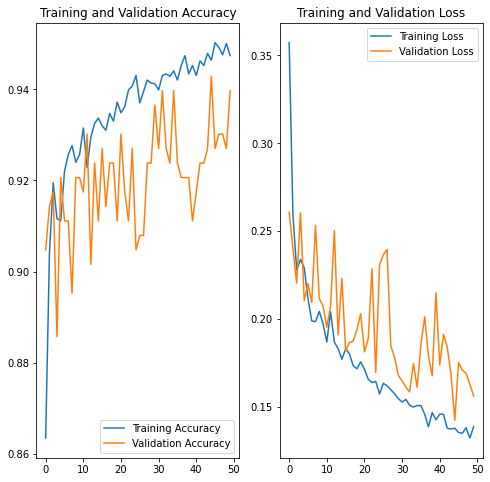

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import model_from_json

model_json = model.to_json()
with open("/content/drive/My Drive/DMW/Left_Right.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/DMW/Left_Right.h5")
print("Saved model to disk")

Saved model to disk


In [11]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('/content/drive/My Drive/DMW/Left_Right/Left_Right.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/DMW/Left_Right/Left_Right.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

Loaded model from disk


In [ ]:
score = loaded_model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = loaded_model.predict(x_np)
y_pred = np.asarray([y > 0.5 for y in y_pred])

cm = confusion_matrix(y_np, y_pred)
print(cm)

[[3331  169]
 [ 145 3355]]
